# Dictionaries and dataframes

Needing a better way of ordering dictionaries was one of the original inspirations for Sciris back in 2014. In those dark days of Python <=3.6, dictionaries were unordered, which meant that `dict.keys()` could give you anything. (And you still can't do `dict.keys()[0]`, much less `dict[0]`). This tutorial describes Sciris' ordered dict, the `odict`, its close cousin the `objdict`, and its pandas-powered pseudorelative, the `dataframe`.

<div class="alert alert-info">
    
Click [here](https://mybinder.org/v2/gh/sciris/sciris/HEAD?labpath=docs%2Ftutorials%2Ftut_intro.ipynb) to open an interactive version of this notebook.
    
</div>


## The `odict`

In basically every situation except one, an `odict` can be used like a `dict`. (Since this is a tutorial, see if you can intuit what that one situation is!) For example, creating an odict works just like creating a regular dict:

In [1]:
import sciris as sc

od = sc.odict(a=['some', 'strings'], b=[1,2,3])
print(od)

#0: 'a': ['some', 'strings']
#1: 'b': [1, 2, 3]


Okay, it doesn't exactly _look_ like a dict, but it is one:

In [2]:
print(f'Keys:   {od.keys()}')
print(f'Values: {od.values()}')
print(f'Items:  {od.items()}')

Keys:   ['a', 'b']
Values: [['some', 'strings'], [1, 2, 3]]
Items:  [('a', ['some', 'strings']), ('b', [1, 2, 3])]


Looks pretty much the same as a regular dict, except that `od.keys()` returns a regular list (so, yes, you can do `od.keys()[0]`). But, you can do thing you can't do with a regular dict, such as:

In [3]:
for i,k,v in od.enumitems():
    print(f'Item {i} is called {k} and has value {v}')

Item 0 is called a and has value ['some', 'strings']
Item 1 is called b and has value [1, 2, 3]


We can, as you probably guessed, also retrieve items by _index_ as well:

In [4]:
print(od['a'])
print(od[0])

['some', 'strings']
['some', 'strings']


Remember the question about the situation where you wouldn't use an odict? The answer is if your dict has integer keys. But float keys are fine (if somewhat strange), and are certainly easier than the equivalent with a regular dict!

In [5]:
import numpy as np

k1 = 100*np.random.randn()
k2 = 100*np.random.randn()
v1 = np.round(k1)
v2 = np.round(k2)
floatdict = sc.odict({k1:v1, k2:v2})
print(floatdict)
print(f'{floatdict[0] = }') # Certainly easier than typing floatdict[18.315426167440474] -- oh wait, what was the right value again?

#0: -192.25169202986308: -192.0
#1: -5.599036524502436:  -6.0
floatdict[0] = -192.0


You might've noticed that the `odict` has more verbose output than a regular dict. This is because its primary purpose is as a high-level container for storing large(ish) objects. For example, let's say we want to store a number of named simulation results:

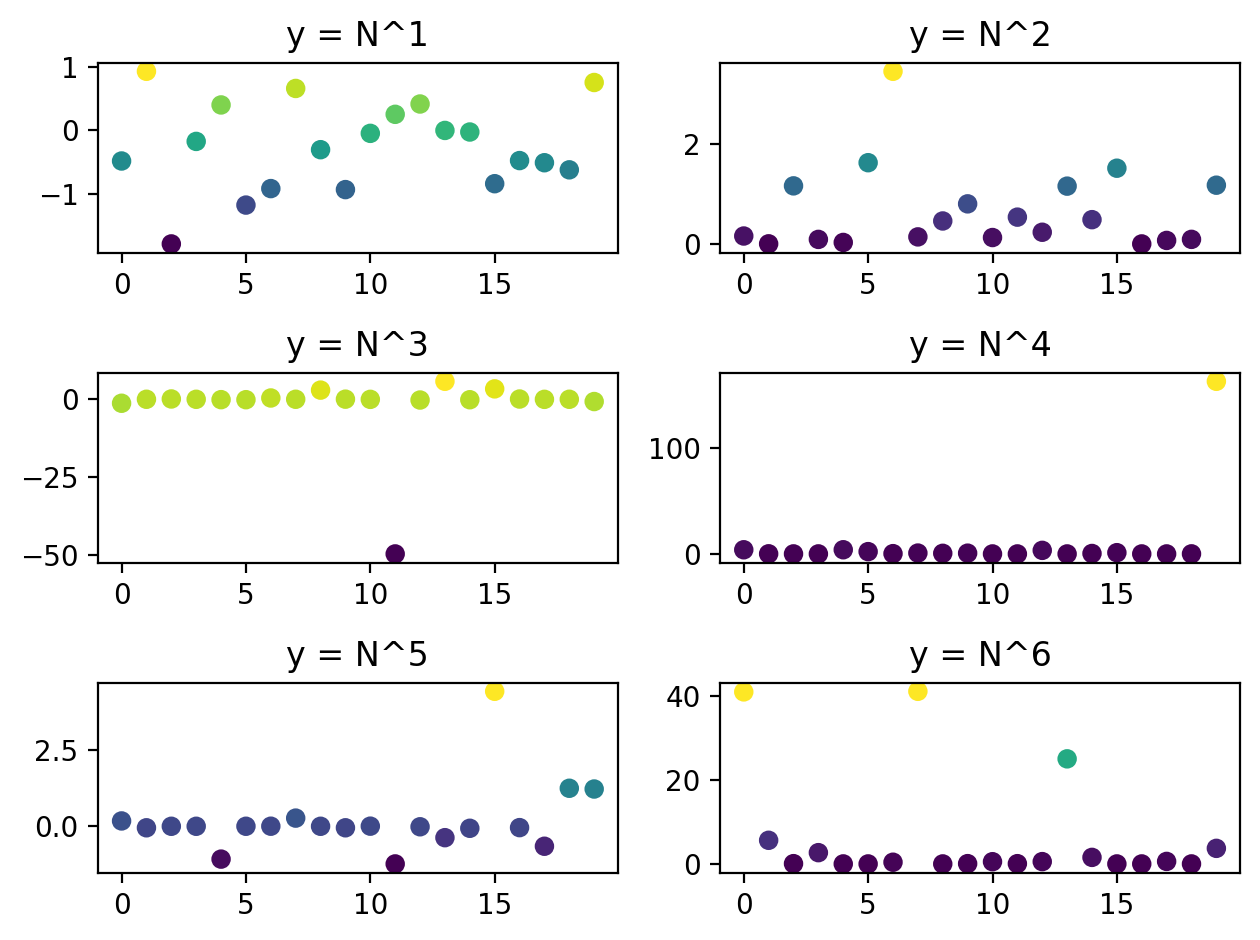

In [6]:
import pylab as pl

class Sim:
    def __init__(self, n=20, n_factors=6):
        self.results = sc.odict()
        self.n = n
        self.n_factors = n_factors
    
    def run(self):
        for i in range(self.n_factors):
            label = f'y = N^{i+1}'
            result = np.random.randn(self.n)**(i+1)
            self.results[label] = result
    
    def plot(self):
        with sc.options.context(jupyter=True):
            pl.figure()
            rows,cols = sc.getrowscols(len(self.results))
            for i,label,result in self.results.enumitems():
                pl.subplot(rows, cols, i+1)
                pl.scatter(np.arange(self.n), result, c=result)
                pl.title(label)
            sc.figlayout()

sim = Sim()
sim.run()
sim.plot()

In [7]:
sim.results

#0: 'y = N^1':
array([-4.79051587e-01,  9.26835838e-01, -1.77894861e+00, -1.72160268e-01,
        3.99442066e-01, -1.17011111e+00, -9.11579142e-01,  6.57953907e-01,
       -3.01913389e-01, -9.27390826e-01, -4.58865764e-02,  2.52472398e-01,
        4.14284744e-01, -1.23651341e-04, -2.47464791e-02, -8.35039218e-01,
       -4.72494610e-01, -5.06225991e-01, -6.17586177e-01,  7.51323442e-01])
#1: 'y = N^2':
array([1.58604162e-01, 2.05081202e-03, 1.16411206e+00, 9.07730809e-02,
       2.95946432e-02, 1.62865321e+00, 3.46116330e+00, 1.41122925e-01,
       4.60218762e-01, 8.03388454e-01, 1.28201729e-01, 5.37144249e-01,
       2.34103934e-01, 1.15863966e+00, 4.86599567e-01, 1.51798506e+00,
       5.79674080e-05, 7.00474696e-02, 9.15094314e-02, 1.17756775e+00])
#2: 'y = N^3':
array([-1.28118702e+00, -3.49486279e-04,  9.80491299e-02, -8.16989958e-03,
       -1.22838568e-01, -1.35650200e-01,  4.14036542e-01, -2.50807241e-04,
        2.94757644e+00,  3.21126962e-02, -2.73269783e-02, -4.97610679e+01